In [1]:
# Imports:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster

# 1. Data

In [2]:
# a.  Load CC General.csv into a pandas DataFrame and print the header. 
#     Use pandas.DataFrame.describe to summarize the data. 
# In a Markdown cell, explain the meaning of each column, make observations based on these statistics, 
# and discuss whether they provide useful insights.

data = pd.read_csv("C:/Users/miche/Downloads/Datasets/CC GENERAL.csv")

display(data.head())
display(data.describe())
display(data.shape)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


(8950, 18)

**Explanation:**

This dataset provides the features involved in the marketing department of a credit card company. For example, the CUST_ID column is used to identify the customer ID, while the CREDIT_LIMIT column identifies the credit limit of each customer. The rest of the columns represent other details/features of each customer in the company.

The second chart provides detailed descriptions of each column, including the number of values, the average, the standard deviation and other details.

In [3]:
# b.  Use pandas.DataFrame.info to check if the entries are the correct data types and if there are any missing values. 
#     Use pandas.DataFrame.duplicates to check for duplicate entries. 
#     Clean the dataset so there are no missing values, duplicate rows, or incorrect data types. 
# Document the changes and cleaning process in Markdown.

display(data.info())
print("Duplicates: \n", data.duplicated().sum())
print("Nulls or Missing: \n", data.isna().sum())

# Clean dataset from missing value rows
data = data.dropna()

# Check whether the action occurred
print("Nulls or Missing: \n", data[["MINIMUM_PAYMENTS", "CREDIT_LIMIT"]].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

None

Duplicates: 
 0
Nulls or Missing: 
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Nulls or Missing: 
 MINIMUM_PAYMENTS    0
CREDIT_LIMIT        0
dtype: int64


**Explanation:**

After checking the dataset for missing values, duplicates, and incorrect data types, I found that there was 1 missing values in the CREDIT_LIMIT column and 313 missing values in the MINIMUM_PAYMENTS column. Since there are 8950 rows, I decided that it would be best to delete/drop the rows containing the missing values. After doing this, I confirmed that changes had been implemented, and found that this action went through.

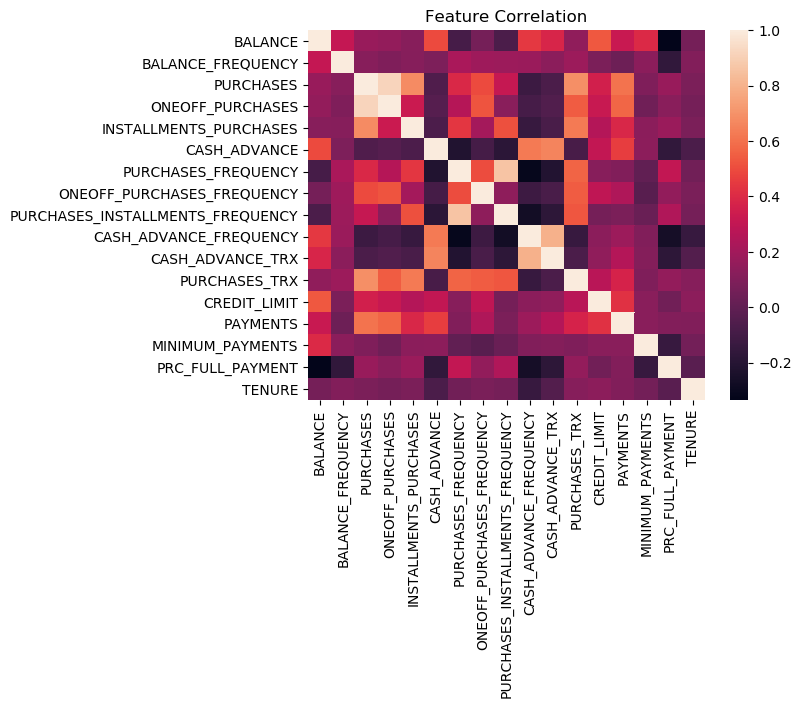

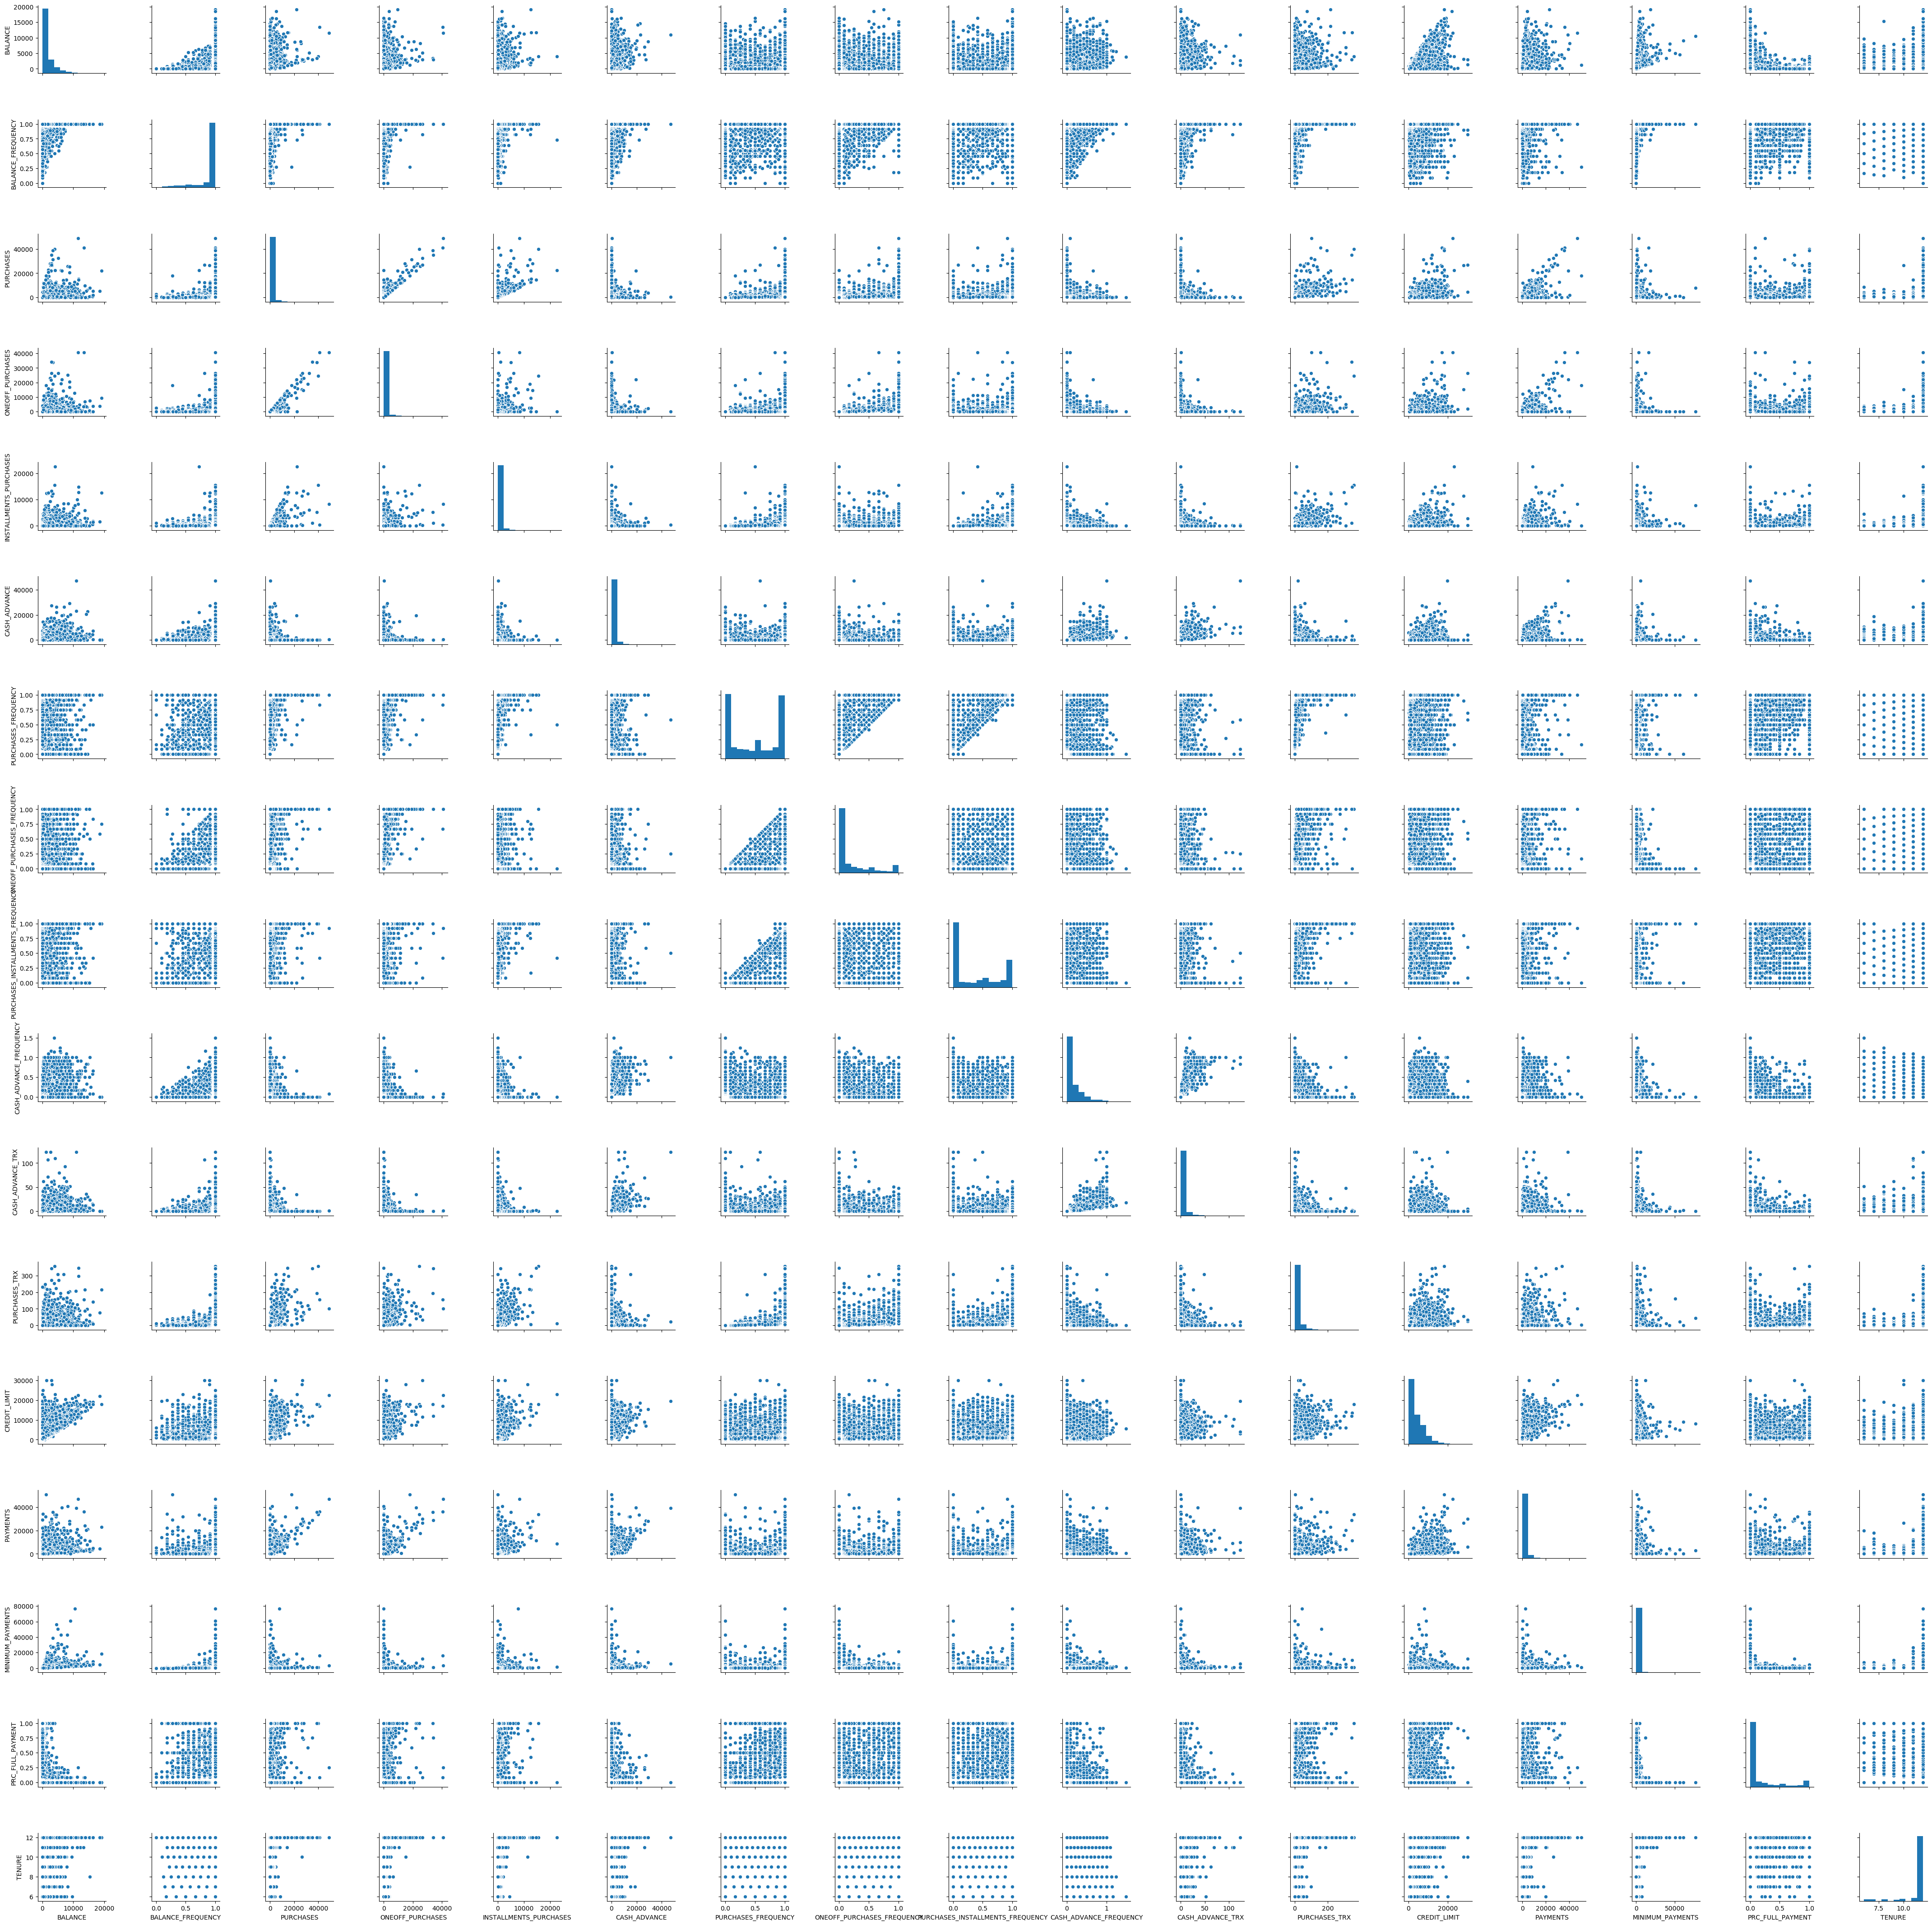

In [4]:
# c.  Drop the 'CUST_ID' column. Use seaborn.heatmap to display the correlation matrix of the features. 
#     Use seaborn.pairplot to generate scatter plots and histograms. 
# Record your observations and discuss the insights gained in Markdown. 

data = data.drop(columns = ["CUST_ID"])

sns.heatmap(data.corr())
plt.title("Feature Correlation")
plt.show()

sns.pairplot(data=data)
plt.show()

**Explanation:**

Based on the heatmap, I can observe that the columns with a strong positive correlation are as follows:

1. PURCHASES and ONEOFF_PURCHASES,
2. PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_FREQUENCY, and
3. CASH_ADVANCE_TRX and CASH_ADVANCE_FREQUENCY

The pairplot confirms these correlations, with columns containing a strong positive correlation having points moving in an angular line towards the top right corner of the plot, while strong negative correlation plots (such as BALANCE and PRC_FULL_PAYMENT) have points moving in an angular line towards the bottom right corner.

# 2. PCA

In [5]:
# a.  Use sklearn.preprocessing.MinMaxScaler to scale the data and print the transformed header. 

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0


In [6]:
# b.  Use sklearn.decomposition.PCA.fit_transform to do a PCA transformation on the data without specifying the number of components. 
#     Print out the explained variance ratios and determine how many components are required to retain at least 95% of the explained variance.

model_zero = PCA()
data_transformed = model_zero.fit_transform(scaled_df.values)
model_zero.explained_variance_ratio_

# 0.503955 + 0.141781 = 0.6457
# 0.503955 + 0.141781 + 0.132912 = 0.7786
# 0.503955 + 0.141781 + 0.132912 + 0.073431 = 0.852
# 0.503955 + 0.141781 + 0.132912 + 0.073431 + 0.057199 = 0.9092
# 0.503955 + 0.141781 + 0.132912 + 0.073431 + 0.057199 + 0.036392 = 0.9456 <- Most optimal number of components (fits within ~95%-100% range)

array([5.03955232e-01, 1.41781755e-01, 1.32912552e-01, 7.34316479e-02,
       5.71994024e-02, 3.63920330e-02, 1.86386577e-02, 1.39294555e-02,
       6.73272748e-03, 5.71488704e-03, 2.94774792e-03, 1.93635861e-03,
       1.31330333e-03, 1.28409975e-03, 1.10626151e-03, 7.23844979e-04,
       3.29000008e-08])

In [7]:
# c.  Perform PCA again with n_components set to retain 95% of the explained variance, and save the transformed data to a new DataFrame.

model = PCA(n_components=6)
final_transformation = model.fit_transform(scaled_df.values)

reduced_df = pd.DataFrame(final_transformation)
print(reduced_df.head())
print(reduced_df.shape)

          0         1         2         3         4         5
0 -0.492046 -0.106987 -0.024615 -0.089864  0.126580 -0.152617
1 -0.620691 -0.030137  0.111544 -0.144935 -0.165132  0.119542
2  0.291581  0.922922 -0.133906  0.055884  0.161039 -0.148840
3 -0.567819  0.023027 -0.070132 -0.106490 -0.026971 -0.208099
4  0.188140 -0.249456 -0.228906 -0.072851  0.012116 -0.124724
(8636, 6)


# 3. Clustering

In [8]:
# a.  Create at least 12 clustering models using K-Means, Hierarchical, and DBSCAN, experimenting with different hyperparameter choices.
# b.  Calculate the silhouette score for each model and tabulate the results.


# K-Means
kmeans_configs = [2, 3, 4, 5, 6]

print("KMeans Models:")
for i, (n_clusters) in enumerate(kmeans_configs):
    km = KMeans(n_clusters=n_clusters, random_state=42)
    km_labels = km.fit_predict(reduced_df)
    km_score = silhouette_score(reduced_df, km_labels)
    print(f"Clusters: {n_clusters}, Score: {km_score}")
    print("Cluster counts:", pd.Series(km_labels).value_counts().to_dict())
    print("-" * 50)

    
# Agglomerative
agglomerative_configs = [(2, 'complete'),(3, 'average'),(4, 'complete'),(5, 'ward'),
                         (2, 'ward'),(3, 'complete'),(4, 'average'),(5, 'average')]

print("Hierarchical Models:")
for i, (n_clusters, linkage_method) in enumerate(agglomerative_configs):
    ac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    ac_labels = ac.fit_predict(reduced_df)
    ac_score = silhouette_score(reduced_df, ac_labels)
    print(f"Agglomerative ({linkage_method}), Clusters: {n_clusters}, Score: {ac_score:.4f}")
    print("Cluster counts:", pd.Series(ac_labels).value_counts().to_dict())
    print("-" * 50)
    
# DBSCAN
dbscan_configs = [[0.35,7],[0.4,9],[0.5,9],[0.55,8],[0.2,10],[0.45,9],[0.6,8]]

print("DBSCAN Models:")
for i, (epsilon, min_points) in enumerate(dbscan_configs):
    db = DBSCAN(eps=epsilon, min_samples=min_points)
    db_clusters = db.fit_predict(reduced_df)
    score = silhouette_score(reduced_df, db_clusters)
    print(f'Eps: {epsilon}, Points: {min_points}, Clusters: {len(set(db_clusters))}, Score: {score} \n\
    Cluster counts: {pd.Series(db_clusters).value_counts().to_dict()}')
    print("-" * 50)

KMeans Models:
Clusters: 2, Score: 0.4127283140936122
Cluster counts: {1: 4690, 0: 3946}
--------------------------------------------------
Clusters: 3, Score: 0.39896786458738226
Cluster counts: {1: 4506, 0: 2714, 2: 1416}
--------------------------------------------------
Clusters: 4, Score: 0.4029657637106361
Cluster counts: {0: 4308, 3: 2174, 1: 1232, 2: 922}
--------------------------------------------------
Clusters: 5, Score: 0.3474399249478871
Cluster counts: {0: 3511, 3: 2092, 1: 1193, 4: 1031, 2: 809}
--------------------------------------------------
Clusters: 6, Score: 0.3656580385953445
Cluster counts: {4: 3204, 2: 2051, 5: 1187, 1: 959, 3: 786, 0: 449}
--------------------------------------------------
Hierarchical Models:
Agglomerative (complete), Clusters: 2, Score: 0.2953
Cluster counts: {1: 4556, 0: 4080}
--------------------------------------------------
Agglomerative (average), Clusters: 3, Score: 0.2814
Cluster counts: {0: 8625, 1: 9, 2: 2}
------------------------

In [9]:
# c.  Select the best model for this use case and justify your choice in Markdown. Compare its silhouette score with your best model from Assignment 2.

**Best Clustering Configurations - based solely on silhouette score:**
<pre>
| Model Type    | Parameters         | Clusters | Silhouette Score | Cluster Counts                          |
|---------------|--------------------|----------|------------------|-----------------------------------------|
| K-Means       | k=2                | 2        | 0.4127           | {1: 4690, 0: 3946}                      |
| K-Means       | k=3                | 3        | 0.3990           | {1: 4506, 0: 2714, 2: 1416}             |
| K-Means       | k=4                | 4        | 0.4030           | {0: 4308, 3: 2174, 1: 1232, 2: 922}     |
| Agglomerative | ward, k=2          | 2        | 0.3555           | {0: 5855, 1: 2781}                      |
| Agglomerative | average, k=4       | 4        | 0.3742           | {1: 5172, 0: 3453, 3: 9, 2: 2}          |
| Agglomerative | average, k=5       | 5        | 0.3668           | {0: 5172, 1: 2769, 4: 684, 3: 9, 2: 2}  |
| DBSCAN        | eps=0.55, minPts=8 | 2        | 0.3801           | {0: 8634, -1: 2}                        |
| DBSCAN        | eps=0.6, minPts=8  | 2        | 0.4067           | {0: 8635, -1: 1}                        |
</pre>
While the above models rank highest by silhouette score, additional criteria must be considered when selecting the best clustering model. One key factor is cluster balance — clusters should contain a reasonably uniform number of points to ensure meaningful segmentation and avoid overfitting or noise.

**Models excluded based on cluster distributions:**

1. Agglomerative (average, k=4 and k=5) — These models include clusters with fewer than 10 points, which may be outliers or noise rather than meaningful groups.
2. DBSCAN (eps=0.55 and eps=0.6) — Despite strong scores, both models effectively produce a single dominant cluster with minimal noise, limiting their usefulness for multi-cluster analysis.

**Final model candidates:**
<pre>
| Model Type    | Parameters         | Clusters | Silhouette Score | Cluster Counts                          |
|---------------|--------------------|----------|------------------|-----------------------------------------|
| K-Means       | k=2                | 2        | 0.4127           | {1: 4690, 0: 3946}                      |
| K-Means       | k=3                | 3        | 0.3990           | {1: 4506, 0: 2714, 2: 1416}             |
| K-Means       | k=4                | 4        | 0.4030           | {0: 4308, 3: 2174, 1: 1232, 2: 922}     |
| Agglomerative | ward, k=2          | 2        | 0.3555           | {0: 5855, 1: 2781}                      |
</pre>
The **K-Means model with k=2** emerges as the best overall choice for this use case. It achieves the highest silhouette score (0.4127) and maintains a balanced cluster distribution, making it suitable for further analysis and interpretation.

Compared to the best model from Assignment 2, this configuration shows a measurable improvement in clustering quality and consistency. The previous best model — a SciPy hierarchical clustering with 2 clusters — achieved a silhouette score of 0.3663, with cluster counts of 4435 and 4201. The K-Means model improves the score by approximately 0.05, though with slightly less uniformity in cluster sizes.

# 4. Conclusions

Clusters: 2, Score: 0.4127283140936122
Cluster counts: {1: 4690, 0: 3946}
Clusters: 3, Score: 0.39896786458738226
Cluster counts: {1: 4506, 0: 2714, 2: 1416}
Clusters: 4, Score: 0.4029657637106361
Cluster counts: {0: 4308, 3: 2174, 1: 1232, 2: 922}


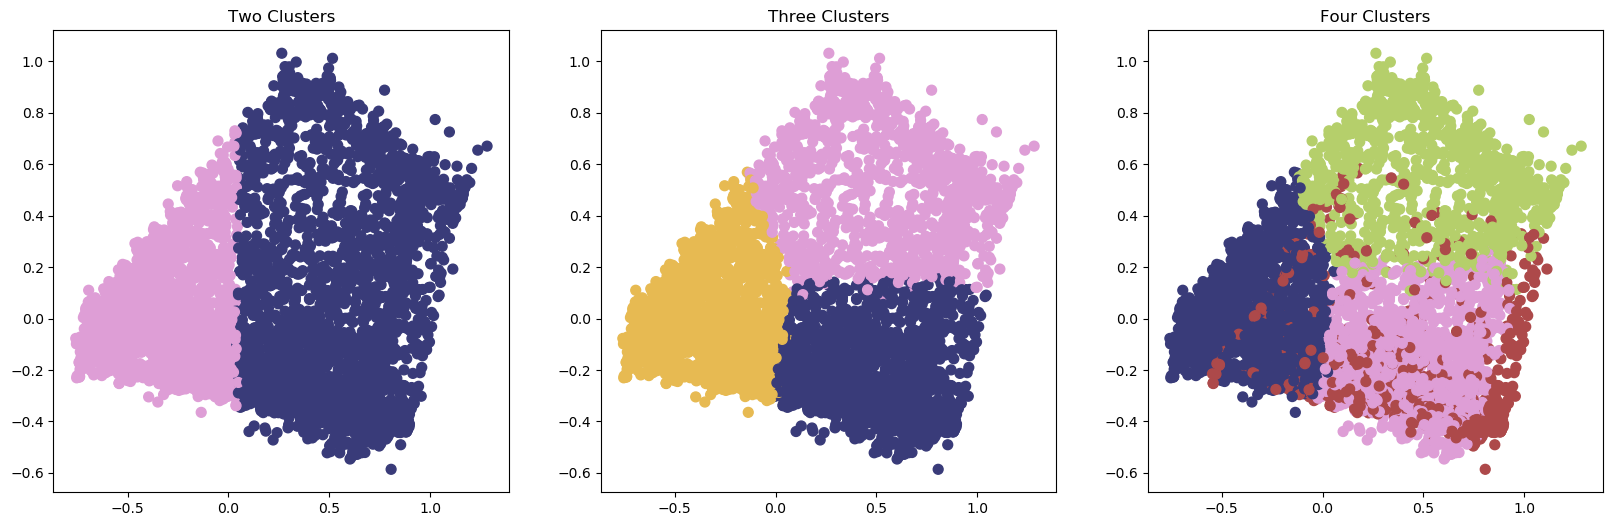

In [10]:
# a.  Generate a scatter plot of the first two principal components of the transformed data. Color the points by cluster assignment. 

km = KMeans(n_clusters=2, random_state=42)
km_labels_2 = km.fit_predict(reduced_df)
km_score = silhouette_score(reduced_df, km_labels_2)
print(f"Clusters: 2, Score: {km_score}")
print("Cluster counts:", pd.Series(km_labels_2).value_counts().to_dict())

km = KMeans(n_clusters=3, random_state=42)
km_labels_3 = km.fit_predict(reduced_df)
km_score = silhouette_score(reduced_df, km_labels_3)
print(f"Clusters: 3, Score: {km_score}")
print("Cluster counts:", pd.Series(km_labels_3).value_counts().to_dict())

km = KMeans(n_clusters=4, random_state=42)
km_labels_4 = km.fit_predict(reduced_df)
km_score = silhouette_score(reduced_df, km_labels_4)
print(f"Clusters: 4, Score: {km_score}")
print("Cluster counts:", pd.Series(km_labels_4).value_counts().to_dict())


fig, axs = plt.subplots(1, 3, figsize=(20,6))

axs[0].scatter(reduced_df.values[:,0], reduced_df.values[:,1], c=km_labels_2, s=50, cmap='tab20b')
axs[0].set_title("Two Clusters")

axs[1].scatter(reduced_df.values[:,0], reduced_df.values[:,1], c=km_labels_3, s=50, cmap='tab20b')
axs[1].set_title("Three Clusters")

axs[2].scatter(reduced_df.values[:,0], reduced_df.values[:,1], c=km_labels_4, s=50, cmap='tab20b')
axs[2].set_title("Four Clusters")
plt.show()

In [11]:
# Comment on the plot in Markdown and explain how it compares with your visualization from Assignment 2.

The scatterplot results are visually strong. The model with two clusters shows clear separation, suggesting that silhouette score alone may not fully capture clustering quality — especially when visual clarity is high despite minor point overlap. Out of curiosity, I also plotted the models with three and four clusters. While the four-cluster model was initially considered due to its high silhouette score, the visual output revealed significant overlap and minimal differentiation compared to the three-cluster model. As shown above, the additional cluster did not provide meaningful separation and introduced ambiguity in group boundaries. Given the business goal — to describe each customer group in a way that provides actionable insights — I consider the three-cluster model the most appropriate moving forward.

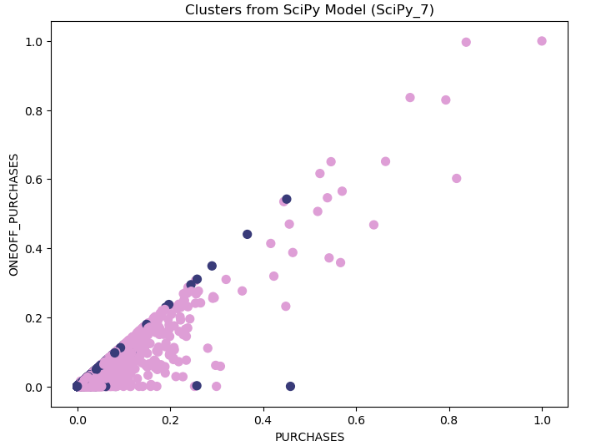

Compared to the visualization from Assignment 2, this result is significantly better. The clusters are more distinct and well-formed, with minimal overlap. While Assignment 2 used two correlated features for plotting, this visualization is based on the two principal components with the highest variance. Although PCA is primarily a dimensionality reduction technique, its use here enhances visual clarity without compromising clustering integrity.

Notably, the two-cluster model shown above is also clearer than the one from Assignment 2, reinforcing the value of PCA-based visualization. Overall, both plots here offer better-defined groupings and stronger interpretability than the previous assignment.

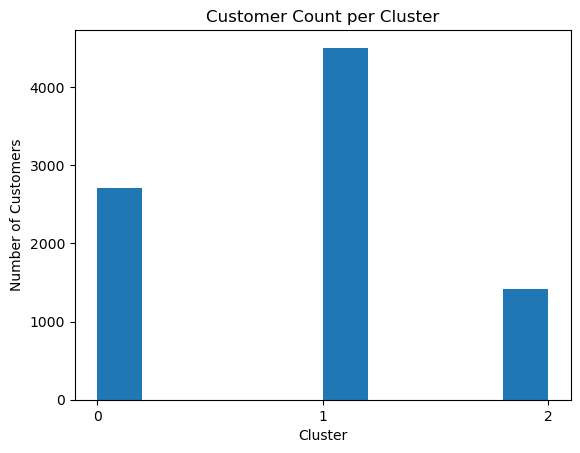

In [12]:
# b.  Generate a histogram showing the number of customers in each cluster

plt.hist(x=km_labels_3)
plt.xticks([0,1,2])
plt.title("Customer Count per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

In [13]:
# Provide observations in Markdown and note whether cluster sizes make sense

The cluster sizes — 4506, 2714, and 1416 — appear reasonable and reflect natural variation in customer behavior. While the clusters are not perfectly uniform, this is expected in real-world data, where customer groups often differ in size due to varying levels of engagement, spending habits, or activity patterns.

For instance, the smallest cluster may represent a niche segment with lower activity or specialized behavior, while the largest cluster could encompass a broader group of highly active customers. Uniformity can be helpful in certain analytical contexts, but perfectly balanced clusters are rarely realistic. What matters more is that each cluster offers meaningful differentiation and insight — which will be explored in the next phase of analysis.

In [14]:
# c.  For each cluster, create a separate DataFrame from the original (untransformed) data and use pandas.DataFrame.describe to describe customer characteristics.

cluster_0 =  pd.DataFrame(scaled_df[km_labels == 0])
cluster_1 =  pd.DataFrame(scaled_df[km_labels == 1])
cluster_2 =  pd.DataFrame(scaled_df[km_labels == 2])

display(cluster_0.describe(), cluster_1.describe(), cluster_2.describe())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,0.075909,0.807354,0.006323,0.006386,0.002240,0.040826,0.201805,0.116509,0.078234,0.193533,0.044507,0.008050,0.105235,0.017921,0.006124,0.062584,0.229399
std,0.088494,0.198162,0.012435,0.014417,0.006891,0.048922,0.257654,0.185260,0.177086,0.177774,0.061395,0.014749,0.094001,0.035402,0.010806,0.178911,0.183555
min,0.000014,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008347,0.000000,0.000004,0.000000,0.000000
25%,0.016511,0.666667,0.000000,0.000000,0.000000,0.002806,0.000000,0.000000,0.000000,0.083333,0.008130,0.000000,0.038397,0.003730,0.001521,0.000000,0.000000
50%,0.048763,0.857143,0.000693,0.000000,0.000000,0.024597,0.111111,0.000000,0.000000,0.148148,0.024390,0.002793,0.065109,0.006587,0.003050,0.000000,0.166667
75%,0.102449,1.000000,0.007389,0.005738,0.000000,0.057493,0.375000,0.166667,0.000000,0.296296,0.065041,0.011173,0.131886,0.016046,0.006241,0.000000,0.333333
max,0.801245,1.000000,0.084413,0.101556,0.058667,0.316667,0.875000,0.833333,0.833333,1.000000,0.504065,0.150838,0.632721,0.394278,0.131633,1.000000,0.666667


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,9.590000e+02,9.590000e+02,959.000000,959.000000
mean,0.008884,0.423895,0.007949,0.006582,0.005416,0.010319,0.216912,0.082287,0.127072,0.029111,0.008418,0.010521,0.134187,3.139975e-02,2.453175e-03,0.269503,0.968891
std,0.020065,0.170117,0.016184,0.018955,0.011253,0.027803,0.177831,0.119774,0.167649,0.057425,0.023439,0.012338,0.114040,6.905011e-02,3.993466e-03,0.346119,0.102394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008347,1.370821e-07,2.431871e-07,0.000000,0.333333
25%,0.000599,0.272727,0.000769,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.048414,4.710273e-03,1.015215e-03,0.000000,1.000000
50%,0.002013,0.454545,0.003293,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.008380,0.098497,1.072092e-02,1.599087e-03,0.100000,1.000000
75%,0.007253,0.545455,0.009734,0.006485,0.006357,0.004014,0.333333,0.083333,0.250000,0.055555,0.008130,0.016760,0.181970,2.853152e-02,2.251477e-03,0.500000,1.000000
max,0.280803,0.909091,0.365929,0.440247,0.133838,0.304893,0.666667,0.583333,0.666667,0.444445,0.333333,0.167598,0.766277,1.000000e+00,5.611087e-02,1.000000,1.000000


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.00000
mean,0.087024,0.950866,0.025343,0.009899,0.037322,0.014843,0.884864,0.138327,0.834573,0.065188,0.020018,0.067558,0.138443,0.032318,0.016280,0.054776,0.94783
std,0.111070,0.139846,0.031118,0.019521,0.048941,0.036799,0.149510,0.180660,0.179991,0.117513,0.046884,0.068572,0.115674,0.044991,0.045519,0.104002,0.17894
min,0.000000,0.000000,0.000245,0.000000,0.000533,0.000000,0.500000,0.000000,0.333333,0.000000,0.000000,0.000000,0.013356,0.000588,0.000000,0.000000,0.00000
25%,0.011766,1.000000,0.007511,0.000000,0.012743,0.000000,0.777778,0.000000,0.666667,0.000000,0.000000,0.033520,0.048414,0.008957,0.002321,0.000000,1.00000
50%,0.052407,1.000000,0.014692,0.000957,0.023203,0.000000,1.000000,0.083333,0.916667,0.000000,0.000000,0.044693,0.098497,0.018858,0.005492,0.000000,1.00000
75%,0.110788,1.000000,0.032292,0.011448,0.045559,0.012181,1.000000,0.250000,1.000000,0.111111,0.016260,0.078212,0.198664,0.037311,0.014362,0.083333,1.00000
max,0.971245,1.000000,0.458813,0.240565,1.000000,0.557282,1.000000,0.750000,1.000000,0.666667,0.577236,0.969274,0.766277,0.800994,1.000000,0.428571,1.00000


In [15]:
# d.  Provide a written conclusion summarizing each customer group for the marketing team, based on the summary statistics. 
#     Include actionable recommendations derived from the characteristics of each cluster.

## Customer Segmentation Summary and Marketing Recommendations

Cluster 1 (2714 clients):  
This group represents **low-spending, long-term customers** who use their credit cards frequently for small purchases and favor installment plans over one-off transactions. They maintain low balances, avoid cash advances, and rarely pay off their full balance. Their low credit limits and payment behavior suggest conservative financial habits or limited access to credit.

Cluster 2 (4506 clients):  
These are **low-activity, long-term customers** who use their cards sparingly, occasionally rely on cash advances, and rarely pay off their full balance. They may be financially cautious, underutilizing their credit, or simply disengaged from card-based spending.

Cluster 3 (1416 clients):  
This segment includes **highly active, long-term customers** who use their credit cards frequently across all transaction types. They spend more, make more one-off purchases, and have higher credit limits and payment volumes than the other groups. While they don’t consistently pay off their full balance, they appear to manage their credit responsibly.

---

Actionable Recommendations

- Cluster 1: Offer incentive-based cards such as **cash-back or points rewards** that encourage increased spending. These customers already use their cards regularly, so a rewards structure could nudge them toward higher transaction volumes.

- Cluster 2: Similar to Cluster 1, this group could benefit from **engagement-focused campaigns** — such as limited-time offers, bonus rewards for first-time usage, or gamified spending challenges — to re-activate dormant behavior.

- Cluster 3: Consider offering **higher credit limits or premium card upgrades** to accommodate their spending habits. These customers are ideal candidates for loyalty programs, exclusive merchant partnerships, and bundled benefits.

- All Clusters: Introduce **third-party sponsored offers** to boost engagement. For example, partnerships with brands like Coca-Cola — similar to RBC’s promotional tie-ins — can drive cross-brand value. These campaigns not only increase customer activity but also strengthen brand visibility and partner revenue.